
## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.


In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data in dataframe
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Find the average age of those who survived and those who did not
df.groupby('Survived').mean()['Age']

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [4]:
# pip install missingno
import missingno as msno
%matplotlib inline

<AxesSubplot:>

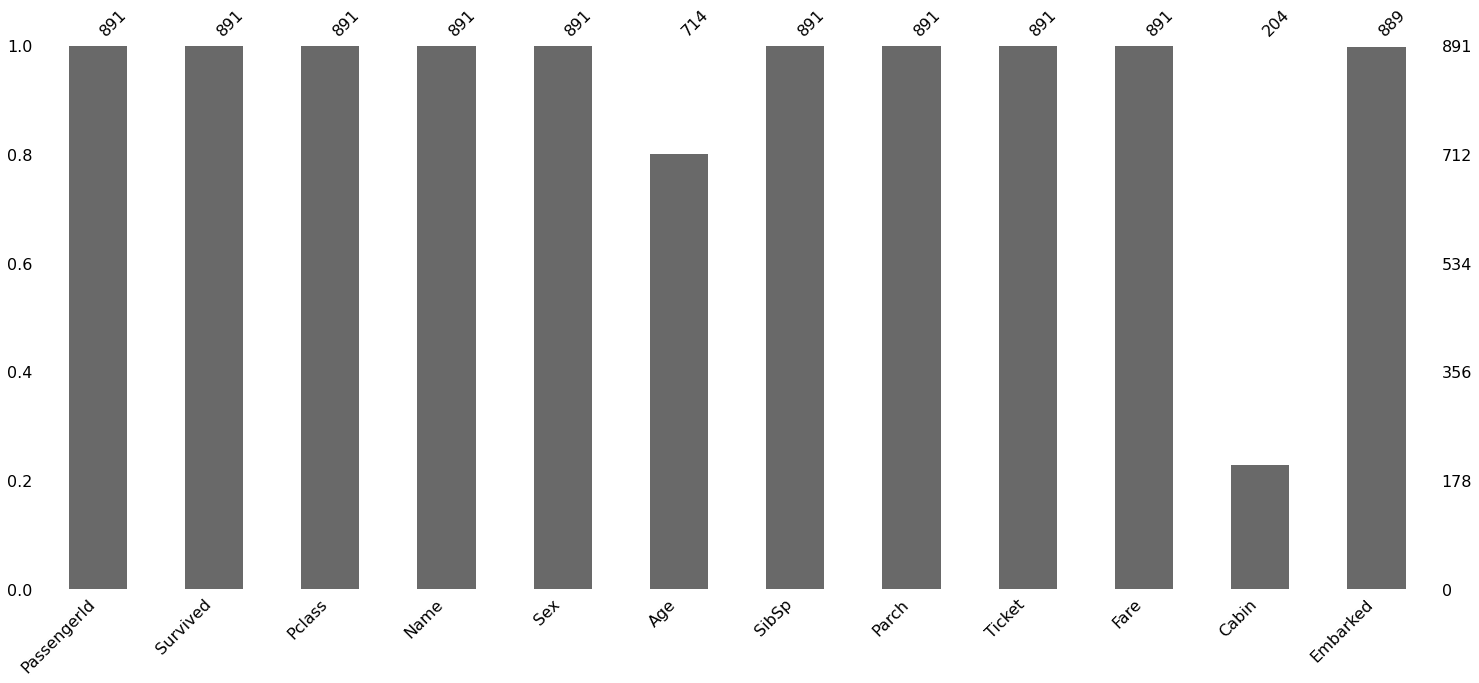

In [5]:
msno.bar(df)

In [6]:
df['Cabin'].isnull().sum()

687

In [7]:
df2 = df[df['Embarked'].notnull()]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [8]:
df2.loc[df2['Cabin'].isnull(),'Cabin'] = '¯\\_(ツ)_/¯'

C:\Users\jinmi\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [9]:
df2['Cabin'].value_counts()

¯\_(ツ)_/¯      687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 147, dtype: int64

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [10]:
df2['FamilyCount'] = df2['SibSp'] + df2['Parch']

C:\Users\jinmi\AppData\Local\Temp/ipykernel_2368/134606962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FamilyCount'] = df2['SibSp'] + df2['Parch']


In [11]:
df2.loc[df2['Name'].str.contains('Rev'), 'IsReverend'] = 1
df2.loc[~df2['Name'].str.contains('Rev'), 'IsReverend'] = 0

C:\Users\jinmi\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)


In [12]:
df_cqs = pd.get_dummies(df2['Embarked'])
df_cqs.columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S']

In [13]:
df3 = df2.join(df_cqs)
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,1,0.0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,0.0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,0.0,0,0,1


In [14]:
df_sex = pd.get_dummies(df3['Sex'])
df_sex.columns = ['Female', 'Male']

In [15]:
df4 = df3.join(df_sex)
df4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Female,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,1,0.0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,0.0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,0.0,0,0,1,0,1


In [16]:
title = df4['Name'].str.split('\,|\.', expand = True)[1]

In [17]:
df_title = pd.get_dummies(title)

In [18]:
df5 = df4.join(df_title)
df5.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,1,0,0,0,0,0


## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [19]:
surv_rate = round(df5['Survived'].sum()/df['Survived'].shape[0],2)
print(f'Overall survival rate is: {surv_rate}')

Overall survival rate is: 0.38


In [20]:
df5.groupby('Sex').count()['Survived']

Sex
female    312
male      577
Name: Survived, dtype: int64

In [21]:
male_surv_rate = round(df5[df5['Sex'] == 'male']['Survived'].sum()/df5[df5['Sex'] == 'male'].shape[0],2)
print(f'Male fared the worst, with a survival rate of {male_surv_rate}')

Male fared the worst, with a survival rate of 0.19


In [22]:
for i in sorted(df5['Pclass'].unique()):
    surv = round(df5[df5['Pclass'] == i]['Survived'].sum()/df5.groupby('Pclass').count()['Survived'][i],2)
    print(f'PClass {i} has a survival rate of {surv}')

PClass 1 has a survival rate of 0.63
PClass 2 has a survival rate of 0.47
PClass 3 has a survival rate of 0.24


In [23]:
rev_surv = df5[df5['IsReverend'] == 1]['Survived'].sum()
print(f'{rev_surv} reverends survived')

0 reverends survived


In [24]:
cabin_surv_rate = round(df5[df5['Cabin'] == '¯\\_(ツ)_/¯']['Survived'].sum()/df5[df5['Cabin'] == '¯\\_(ツ)_/¯'].shape[0],2)
print(f'Survival rate for cabin marked ¯\\_(ツ)_/¯: {cabin_surv_rate}')

Survival rate for cabin marked ¯\_(ツ)_/¯: 0.3


In [25]:
age_surv_rate = round(df5[df5['Age'].isnull()]['Survived'].sum()/df5[df5['Age'].isnull()].shape[0],2)
print(f'Survival rate for empty ages: {age_surv_rate}')

Survival rate for empty ages: 0.29


In [26]:
for i in sorted(df5['Embarked'].unique()):
    surv = round(df5[df5['Embarked'] == i]['Survived'].sum()/df5.groupby('Embarked').count()['Survived'][i],2)
    print(f'Embarked {i} has a survival rate of {surv}')

Embarked C has a survival rate of 0.55
Embarked Q has a survival rate of 0.39
Embarked S has a survival rate of 0.34


In [27]:
for i in sorted(df5['Pclass'].unique()):
    surv = round(df5[(df5['Pclass'] == i) & (df5['Age'] < 12)]['Survived'].sum()/df5[df5['Age'] < 12].groupby('Pclass').count()['Survived'][i],2)
    print(f'Children in PClass {i} has a survival rate of {surv}')

Children in PClass 1 has a survival rate of 0.75
Children in PClass 2 has a survival rate of 1.0
Children in PClass 3 has a survival rate of 0.4


In [28]:
df5[df5['Name'].str.contains('Capt')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,...,0,0,0,0,0,0,0,0,0,0


The Captain is on the list but did not survive.

In [29]:
max_fare = df5[df5['Survived'] == 0]['Fare'].max()
print(df5[(df5['Survived'] == 0) & (df5['Fare'] == max_fare)]['Name'])
print()
print(max_fare)

27     Fortune, Mr. Charles Alexander
438                 Fortune, Mr. Mark
Name: Name, dtype: object

263.0


Mr Charles Alexander and Mr Mark have the most expensive ticket ($263)

In [30]:
df5.groupby(['FamilyCount'])['Survived'].value_counts(normalize = True)

FamilyCount  Survived
0            0           0.699065
             1           0.300935
1            1           0.552795
             0           0.447205
2            1           0.578431
             0           0.421569
3            1           0.724138
             0           0.275862
4            0           0.800000
             1           0.200000
5            0           0.863636
             1           0.136364
6            0           0.666667
             1           0.333333
7            0           1.000000
10           0           1.000000
Name: Survived, dtype: float64

In [31]:
df5.groupby(['Survived'])['FamilyCount'].value_counts()

Survived  FamilyCount
0         0              374
          1               72
          2               43
          5               19
          4               12
          3                8
          6                8
          10               7
          7                6
1         0              161
          1               89
          2               59
          3               21
          6                4
          4                3
          5                3
Name: FamilyCount, dtype: int64

In [32]:
df5.groupby(['Survived'])['FamilyCount'].value_counts(normalize = True)

Survived  FamilyCount
0         0              0.681239
          1              0.131148
          2              0.078324
          5              0.034608
          4              0.021858
          3              0.014572
          6              0.014572
          10             0.012750
          7              0.010929
1         0              0.473529
          1              0.261765
          2              0.173529
          3              0.061765
          6              0.011765
          4              0.008824
          5              0.008824
Name: FamilyCount, dtype: float64

In [33]:
df5[['Survived','FamilyCount']].corr()

,Survived,FamilyCount
Survived,1.000000,0.018277
FamilyCount,0.018277,1.000000


Having family on the ship neither help nor hurt the chances of survival.

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


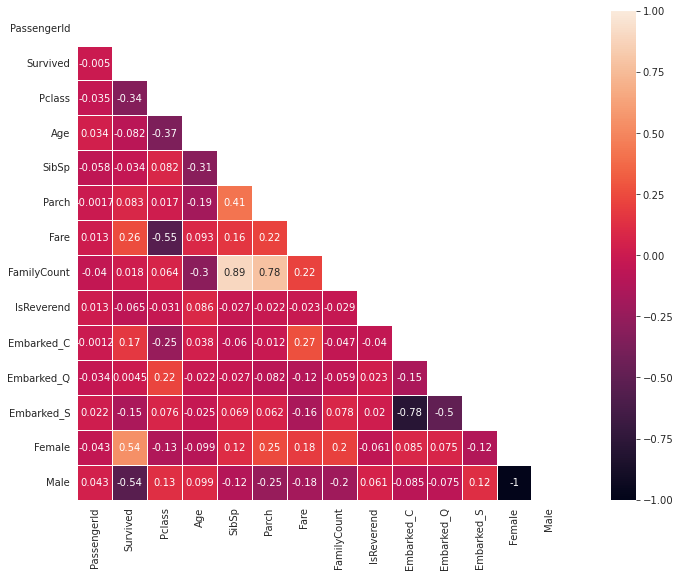

In [34]:
# Establish size of figure.
plt.figure(figsize = (16,9))

# Get correlation of variables.
corr = df4.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

Text(0, 0.5, 'No. of tickets sold')

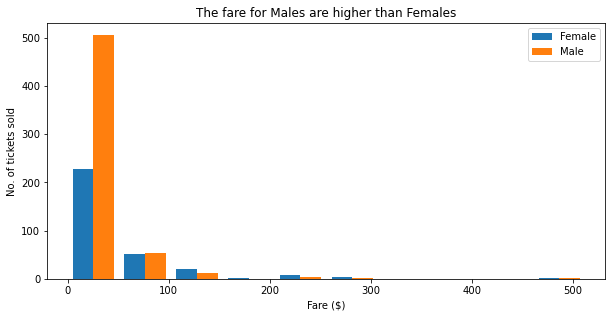

In [35]:
# Establish figure size.
plt.figure(figsize = (10,16))

ax1 = plt.subplot(3, 1, 1)
ax1.set_title('The fare for Males are higher than Females')
ax1.hist([df5[df5['Sex'] == 'female']['Fare'],df5[df5['Sex'] == 'male']['Fare']], label = ['Female', 'Male'])
plt.legend(loc='upper right')

plt.xlabel("Fare ($)")
plt.ylabel("No. of tickets sold")


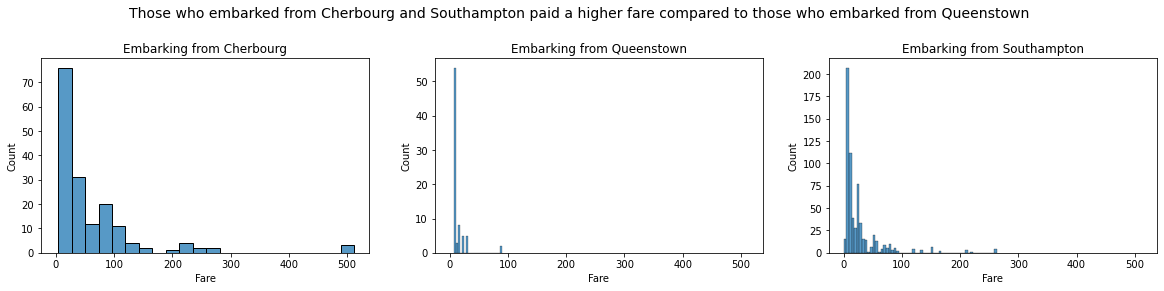

In [36]:
plt.figure(figsize = (20,4))

ax1 = plt.subplot(1, 3, 1)
sns.histplot(df5[df5['Embarked'] == 'C']['Fare']).set_title('Embarking from Cherbourg')

ax2 = plt.subplot(1, 3, 2, sharex = ax1)
sns.histplot(df5[df5['Embarked'] == 'Q']['Fare']).set_title('Embarking from Queenstown')

ax3 = plt.subplot(1, 3, 3, sharex = ax2)
sns.histplot(df5[df5['Embarked'] == 'S']['Fare']).set_title('Embarking from Southampton')

plt.suptitle("Those who embarked from Cherbourg and Southampton paid a higher fare compared to those who embarked from Queenstown ", fontsize=14)

plt.subplots_adjust(top=0.8)

Text(0.5, 1.0, 'There are more males embarking from Southampton')

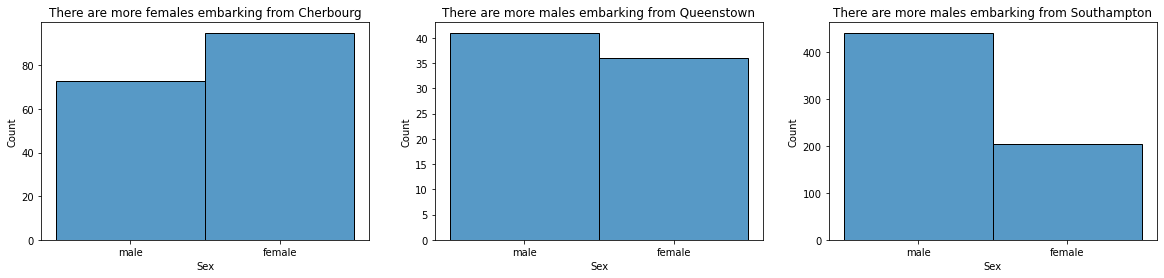

In [37]:
plt.figure(figsize = (20,4))

ax1 = plt.subplot(1, 3, 1)
sns.histplot(df5[df5['Embarked'] == 'C']['Sex']).set_title('There are more females embarking from Cherbourg')

ax2 = plt.subplot(1, 3, 2, sharex = ax1)
sns.histplot(df5[df5['Embarked'] == 'Q']['Sex']).set_title('There are more males embarking from Queenstown')

ax2 = plt.subplot(1, 3, 3, sharex = ax2)
sns.histplot(df5[df5['Embarked'] == 'S']['Sex']).set_title('There are more males embarking from Southampton')
